In [ ]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.ndim)

3


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
print(train_images.dtype)

uint8


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_images[4,7,12]

55

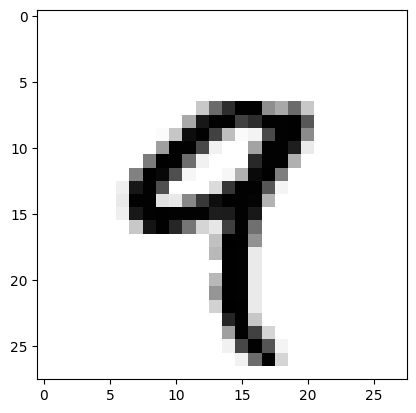

In [ ]:
digit = train_images[4]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [ ]:
digit.dtype

dtype('uint8')

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
test_labels[0]

7

In [ ]:
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',input_shape=(28*28,)))
network.add(layers.Dense(256,activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
train_images= train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
network.fit(train_images,train_labels,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.2331 - accuracy: 0.9289
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0837 - accuracy: 0.9739
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0558 - accuracy: 0.9827
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0389 - accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0075 - accura

In [ ]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0904 - accuracy: 0.9805


In [ ]:
print('test_acc:',test_acc)

test_acc: 0.9804999828338623


In [ ]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
